<center><h1>Time series analysis</h1></center>
<center><h2>Laboratorio 2</h2></center>
<br>


In [1]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
def plot_components_x13(results, name, label='',):
    colours=['#D62728', '#FF7F0E', '#2CA02C', '#1F77B4']
    fig, ax = plt.subplots(2,2, figsize=(12,8))
    ax[0,0].plot(results.observed, color=colours[0], alpha=0.95)
    ax[0,0].set(ylabel=label, title='Observed')
    ax[0,1].plot(results.trend, color=colours[1], alpha=0.95)
    ax[0,1].set(title='Trend')
    ax[1,0].plot(results.observed/results.seasadj, color=colours[2],  alpha=0.95)
    ax[1,0].set(ylabel=label, title='Seasonal')
    ax[1,1].plot(results.irregular, color=colours[3],  alpha=0.95)
    ax[1,1].set(title='Irregular')
    sns.despine()
    fig.suptitle("Descomposición de la Serie Temporal " + name +" (X-13 ARIMA-SEATS)", fontsize=13.5)   
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    return fig, ax

In [4]:
def histogram(series):
    fig, ax= plt.subplots();#figsize=(8,5))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': '#1F77B4'},  
                 kde_kws={'color': 'black', 'alpha': 0.7}, align='left')
    sns.despine()
    return fig, ax

In [5]:
plt.rcParams['figure.figsize'] = [12, 8]

## Lectura de datos


In [6]:
data = pd.read_csv('datasets/demanda.csv', index_col='TIPO', parse_dates=True, dayfirst=False)
data.tail()

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
TIPO,,,,
2019-03-01,4004709.444,3044854.983,3072063.284,1.012163e+07
2019-04-01,3652724.519,2892482.731,3029687.889,9.574895e+06
2019-05-01,4356836.823,2973830.213,3055527.035,1.038619e+07
2019-06-01,4816838.191,2937048.667,2897618.673,1.065151e+07
2019-07-01,5704951.016,3288949.873,3035538.422,1.202944e+07


In [7]:
y1 = data['Residencial'].copy()
y2 = data['Comercial'].copy()
y3 = data['Industrial/Comercial Grande'].copy()
y4 = data['TOTAL'].copy()

y1.index = y1.index.to_period(freq='M')
y2.index = y2.index.to_period(freq='M')
y3.index = y3.index.to_period(freq='M')
y4.index = y4.index.to_period(freq='M')

ts1 = data['Residencial']
ts2 = data['Comercial']
ts3 = data['Industrial/Comercial Grande']
ts4 = data['TOTAL']

In [8]:
data.describe().round(2)

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
count,79.00,79.00,79.00,79.00
mean,4551935.29,3113096.42,3187977.02,10853008.74
std,654164.93,206829.98,124659.74,816874.81
min,3239380.70,2809183.13,2897618.67,9307334.16
25%,3990580.45,2948084.14,3109179.19,10223259.40
50%,4470715.12,3070853.24,3199317.20,10706955.32
75%,5092450.46,3270751.91,3275571.56,11476364.98
max,6193110.21,3606989.07,3460879.97,12607552.72


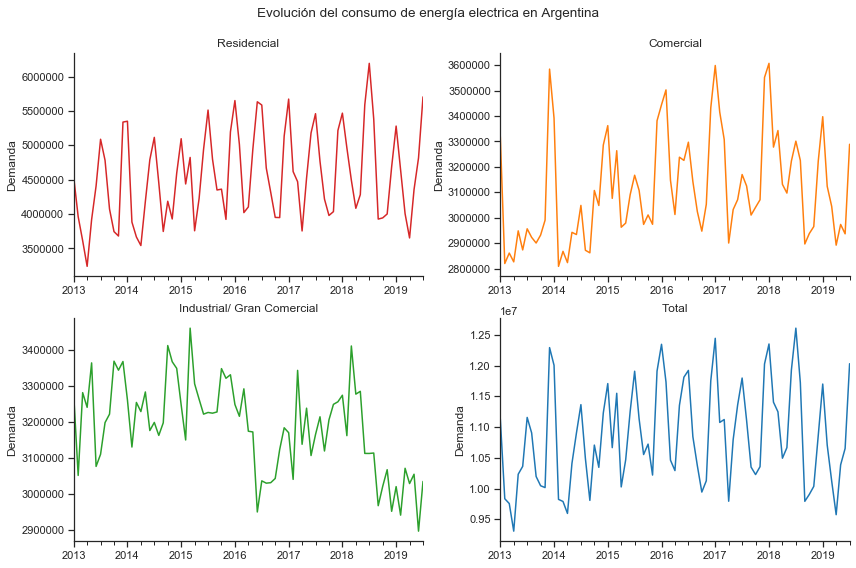

In [9]:
colours=['#D62728', '#FF7F0E', '#2CA02C', '#1F77B4']
label=''
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax1 = plt.subplot(221)
y1.plot(color=colours[0])
ax1.set_title("Residencial", {'fontsize': 12})
ax1.set_ylabel('Demanda')
ax1.set_xlabel('')
ax2 = plt.subplot(222)
y2.plot(color=colours[1])
ax2.set_title("Comercial", {'fontsize': 12})
ax2.set_ylabel('Demanda')
ax2.set_xlabel('')

ax3 = plt.subplot(223)
y3.plot(color=colours[2])
ax3.set_title('Industrial/ Gran Comercial', {'fontsize': 12})
ax3.set_ylabel('Demanda')
ax3.set_xlabel('')

ax4 = plt.subplot(224)
y4.plot(color=colours[3])
ax4.set_title('Total', {'fontsize': 12})
ax4.set_ylabel('Demanda')
ax4.set_xlabel('')

sns.despine()
fig.suptitle("Evolución del consumo de energía electrica en Argentina", fontsize=13.5)   
fig.tight_layout()
fig.subplots_adjust(top=0.9)


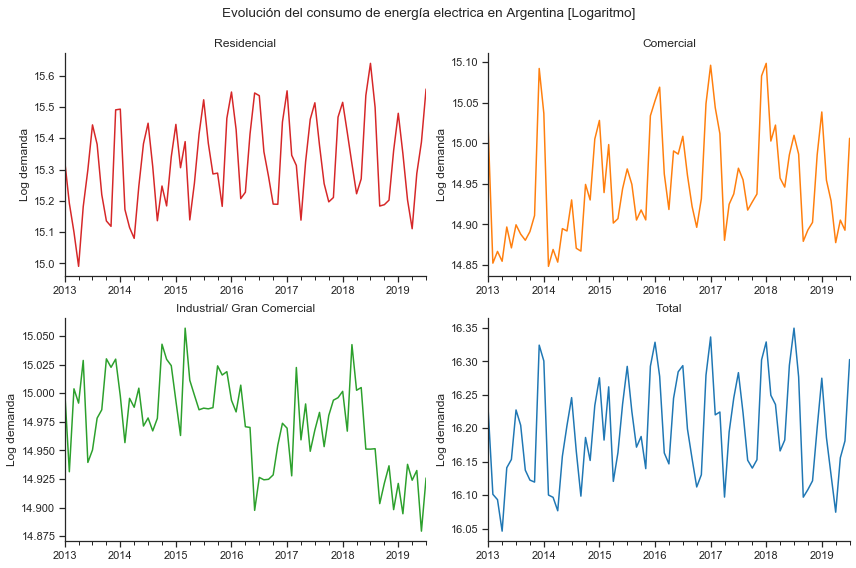

In [10]:
colours=['#D62728', '#FF7F0E', '#2CA02C', '#1F77B4']
label=''
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax1 = plt.subplot(221)
np.log(y1).plot(color=colours[0])
ax1.set_title("Residencial", {'fontsize': 12})
ax1.set_ylabel('Log demanda')
ax1.set_xlabel('')

ax2 = plt.subplot(222)
np.log(y2).plot(color=colours[1])
ax2.set_title("Comercial", {'fontsize': 12})
ax2.set_ylabel('Log demanda')
ax2.set_xlabel('')

ax3 = plt.subplot(223)
np.log(y3).plot(color=colours[2])
ax3.set_title('Industrial/ Gran Comercial', {'fontsize': 12})
ax3.set_ylabel('Log demanda')
ax3.set_xlabel('')

ax4 = plt.subplot(224)
np.log(y4).plot(color=colours[3])
ax4.set_title('Total', {'fontsize': 12})
ax4.set_ylabel('Log demanda')
ax4.set_xlabel('')

sns.despine()
fig.suptitle("Evolución del consumo de energía electrica en Argentina [Logaritmo]", fontsize=13.5)   
fig.tight_layout()
fig.subplots_adjust(top=0.9)


No se observa cambios significativos en la forma de las curvas al aplicar logaritmo lo que nos indica que una descomposición aditiva sería adecuada.

## Descomposición de la serie con X-13 ARIMA-SETS


In [11]:
decomposition1 = sm.tsa.x13_arima_analysis(ts1,x12path='.')
decomposition2 = sm.tsa.x13_arima_analysis(ts2,x12path='.')
decomposition3 = sm.tsa.x13_arima_analysis(ts3,x12path='.')
decomposition4 = sm.tsa.x13_arima_analysis(ts4,x12path='.')


/home/claudio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/statsmodels/tsa/x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)
/home/claudio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/statsmodels/tsa/x13.py:187: X13Warning: WARNING: Visually significant seasonal and trading day peaks have 
          been found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)
/home/claudio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/statsmodels/tsa/x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


Verificamos la existencia de resultados

In [12]:
print("Serie Residencial                  ", dir(decomposition1)[-6:])
print("Serie Comercial                    ",dir(decomposition2)[-6:])
print("Serie Industrial/Gran Comercial    ",dir(decomposition3)[-6:])
print("Serie Total                        ",dir(decomposition4)[-6:])


Serie Residencial                   ['observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']
Serie Comercial                     ['observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']
Serie Industrial/Gran Comercial     ['observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']
Serie Total                         ['observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']


Todas las series fueron descompuestas correctamente. Imprimimos las series con la sin estacionalidad

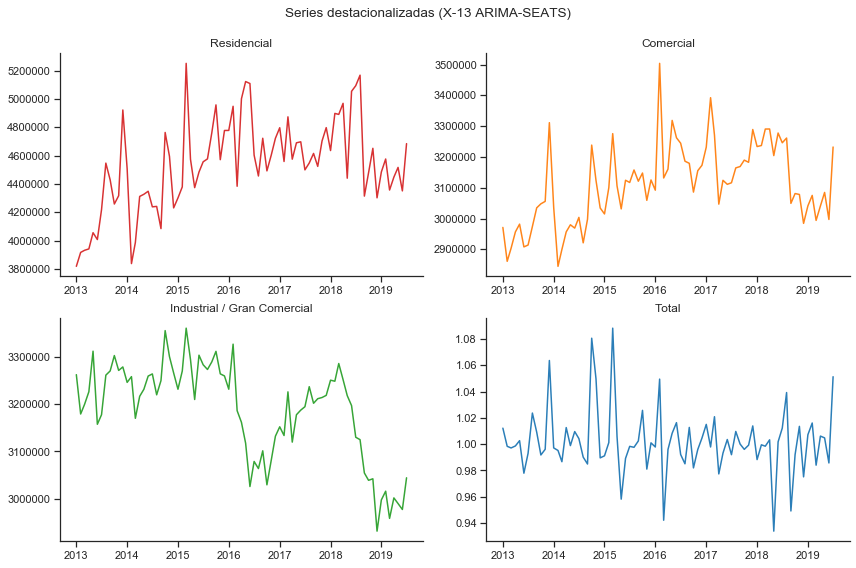

In [13]:
colours=['#D62728', '#FF7F0E', '#2CA02C', '#1F77B4']
label=''
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax[0,0].plot(decomposition1.seasadj, color=colours[0], alpha=0.95)
ax[0,0].set(ylabel=label, title='Residencial')
ax[0,1].plot(decomposition2.seasadj, color=colours[1], alpha=0.95)
ax[0,1].set(title='Comercial')
ax[1,0].plot(decomposition3.seasadj, color=colours[2],  alpha=0.95)
ax[1,0].set(ylabel=label, title='Industrial / Gran Comercial')
ax[1,1].plot(decomposition4.irregular, color=colours[3],  alpha=0.95)
ax[1,1].set(title='Total')
sns.despine()
fig.suptitle("Series destacionalizadas (X-13 ARIMA-SEATS)", fontsize=13.5)   
fig.tight_layout()
fig.subplots_adjust(top=0.9)


El algoritmo X13 nos informa que la descomposición multiplicativa funciona levemente mejor en las 4 series de datos que la aditiva por lo que es la que adopta.

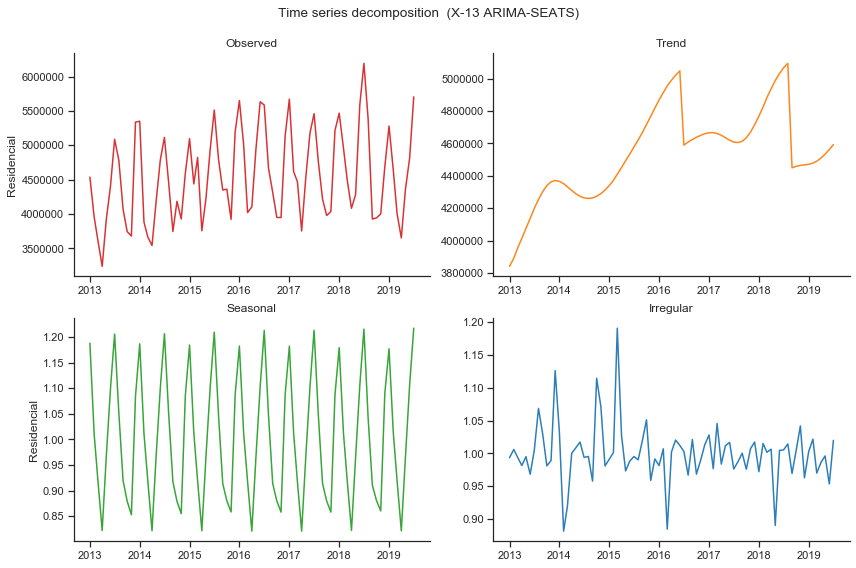

In [14]:
from plotting import plot_components_x13
plot_components_x13(decomposition1, "Residencial")
plt.show()

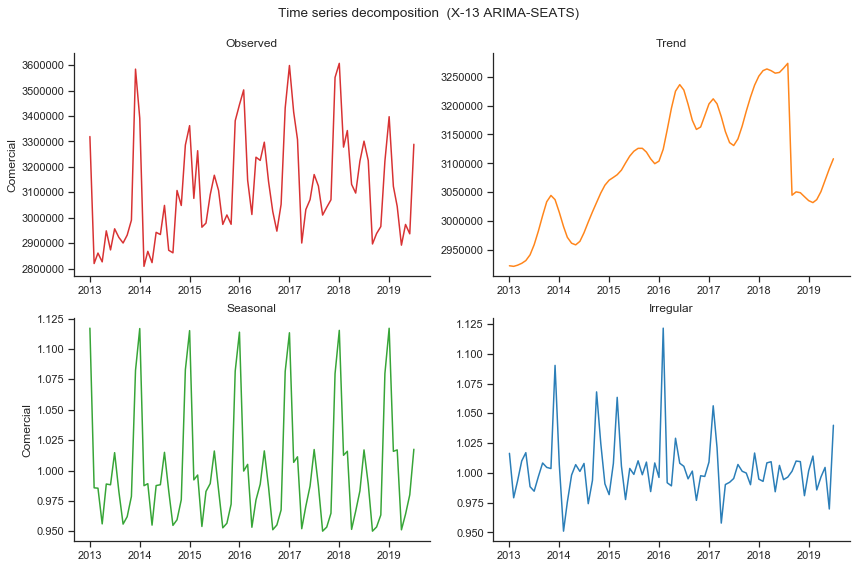

In [15]:
from plotting import plot_components_x13
plot_components_x13(decomposition2, "Comercial")
plt.show()

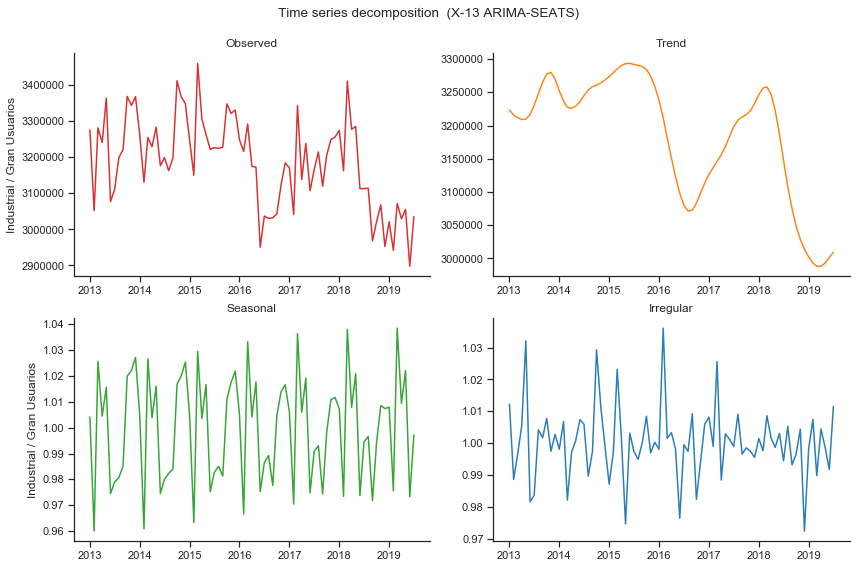

In [16]:
from plotting import plot_components_x13
plot_components_x13(decomposition3, "Industrial / Gran Usuarios")
plt.show()

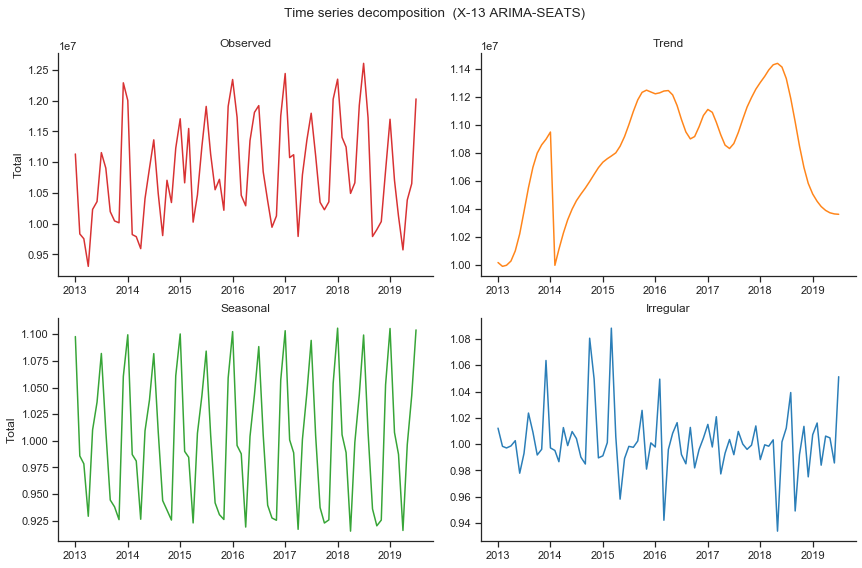

In [17]:
from plotting import plot_components_x13
plot_components_x13(decomposition4, "Total")
plt.show()

EL comportamiento de las series descompuestas no es claro. Las series de tendencia tienen mucha variabilidad. La descomposición estacional y la irregular parecen tener comportamientos adecuados.

### Guardamos los resultados del X-13-ARIMA para cada una de las series analizadas.

In [18]:
f=open('Residencial_x13results.txt', mode='w+')
f.write(decomposition1.results)
f.close()

f=open('Comercial_x13results.txt', mode='w+')
f.write(decomposition2.results)
f.close()

f=open('Industrial_x13results.txt', mode='w+')
f.write(decomposition3.results)
f.close()

f=open('Total_x13results.txt', mode='w+')
f.write(decomposition4.results)
f.close()



## Modelado de la serie con Holt Winter smoothing

In [19]:
def hw_summary(model_sm):
    alpha_sm = model_sm.model.params['smoothing_level']
    betha_sm = model_sm.model.params['smoothing_slope']
    delta_sm = model_sm.model.params['smoothing_seasonal']
    mse_sm = sm.tools.eval_measures.mse(model_sm.data.endog,model_sm.fittedvalues)
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_sm))
    print(' Smoothing parameter: betha  {0:.3f}'.format(betha_sm))
    print(' Smoothing parameter: delta  {0:.3f}'.format(delta_sm))
    print(' In-sample fit:')
    print(' MSE               {:,.2f}'.format(mse_sm))
    print(' RMSE              {:,.2f}'.format(rmse_sm))
    return

In [20]:
ahw_sm1_a=sm.tsa.ExponentialSmoothing(y1, trend='add', damped=False,seasonal='add', seasonal_periods=12).fit()
mhw_sm1_a=sm.tsa.ExponentialSmoothing(y1, trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
mhw_damped_sm1_a=sm.tsa.ExponentialSmoothing(y1, trend='add', damped=True, seasonal='mul', seasonal_periods=12).fit()
ahw_sm1_s=sm.tsa.ExponentialSmoothing(y1, trend='add', damped=False,seasonal='add', seasonal_periods=6).fit()
mhw_sm1_s=sm.tsa.ExponentialSmoothing(y1, trend='add', damped=False, seasonal='mul', seasonal_periods=6).fit()
mhw_damped_sm1_s=sm.tsa.ExponentialSmoothing(y1, trend='add', damped=True, seasonal='mul', seasonal_periods=6).fit()

In [21]:
print('Serie Residencial');
print('Modelo estacional aditivo anual');
print( hw_summary(ahw_sm1_a));
print('Modelo estacional multiplicativo anual');
print( hw_summary(mhw_sm1_a));
print('Modelo estacional multiplicativo con tendencia amortiguada anual');
print( hw_summary(mhw_damped_sm1_a));

print('Modelo estacional aditivo semestral');
print( hw_summary(ahw_sm1_s));
print('Modelo estacional multiplicativo semestral');
print( hw_summary(mhw_sm1_s));
print('Modelo estacional multiplicativo con tendencia amortiguada semestral');
print( hw_summary(mhw_damped_sm1_s));

Serie Residencial
Modelo estacional aditivo anual
 Smoothing parameter: alpha  0.105
 Smoothing parameter: betha  0.000
 Smoothing parameter: delta  0.445
 In-sample fit:
 MSE               105,970,053,433.45
 RMSE              325,530.42
None
Modelo estacional multiplicativo anual
 Smoothing parameter: alpha  0.275
 Smoothing parameter: betha  0.000
 Smoothing parameter: delta  0.000
 In-sample fit:
 MSE               62,379,532,122.30
 RMSE              249,758.95
None
Modelo estacional multiplicativo con tendencia amortiguada anual
 Smoothing parameter: alpha  0.292
 Smoothing parameter: betha  0.053
 Smoothing parameter: delta  0.000
 In-sample fit:
 MSE               62,943,192,461.26
 RMSE              250,884.82
None
Modelo estacional aditivo semestral
 Smoothing parameter: alpha  0.306
 Smoothing parameter: betha  0.066
 Smoothing parameter: delta  0.000
 In-sample fit:
 MSE               93,942,059,540.52
 RMSE              306,499.69
None
Modelo estacional multiplicativo seme

El modelo estacional multiplicativo anual es el que mejor ajusta de acuerdo a los parámetros de error


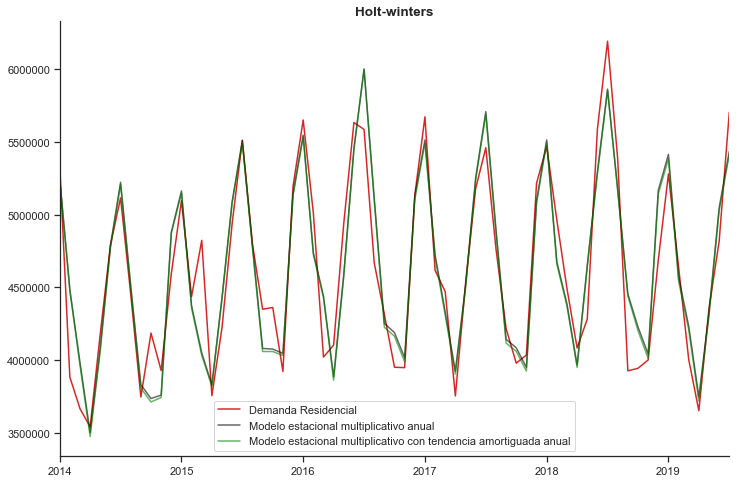

In [22]:
smoothed_a=pd.Series(mhw_sm1_a.fittedvalues, index=y1.index)
smoothed_b=pd.Series(mhw_damped_sm1_a.fittedvalues, index=y1.index)
fig, ax= plt.subplots();#figsize=(9,6))

y1['2014':].plot(color='#D62728', label='Demanda Residencial')
smoothed_a['2014':].plot(color='black', label='Modelo estacional multiplicativo anual', alpha=0.6)
smoothed_b['2014':].plot(color='green', label='Modelo estacional multiplicativo con tendencia amortiguada anual', alpha=0.6)

plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

Se observa en el gráfico que el modelo estacional multiplicativo predice mejor la serie analizada

## Diagnóstico del modelo


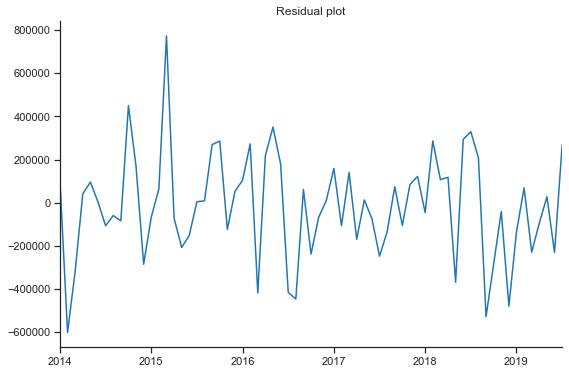

In [23]:
resid = (y1-mhw_sm1_a.fittedvalues)[12:] # we remove the first 12 observations as they are for initialisitation only

fig, ax= plt.subplots(figsize=(9,6))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

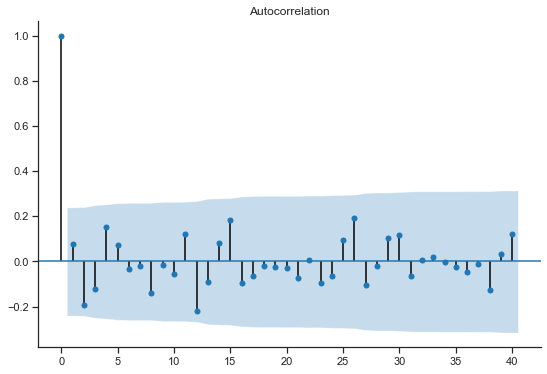

In [24]:
fig, ax = plt.subplots(figsize=(9,6))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

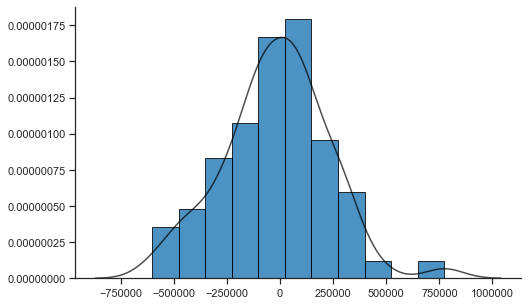

In [25]:
from plotting import histogram
histogram(resid)
plt.show()

Como la distribución del error se aproxima a una normal y los valores de la autocorrelación del error son bajos, podemos concluir que el ajuste es adecuado

## Validación del modelo

In [26]:
start_val = y1.index[-round(len(y1)/12*.3)*12]
start_val


Period('2017-08', 'M')

In [28]:
# Real time forecasting 
validation=y1[start_val:].index
start = y1.index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
pred4 = [] # multiplicative holt winters damped
actual= []

for i in range(start, len(y1)):
    
    actual.append(y1.iloc[i]) # actual value
    
    pred1.append(y1.iloc[i-12]) # seasonal random walk forecast
    
    model_a = sm.tsa.ExponentialSmoothing(y1.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=12).fit()
    pred2.append(model_a.forecast(1)[0]) # additive holt winters forecast
    
    model_b = sm.tsa.ExponentialSmoothing(y1.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
    pred3.append(model_b.forecast(1)[0]) # multiplicate holt winters forecast

    model_c = sm.tsa.ExponentialSmoothing(y1.iloc[:i], trend='add', damped=True, seasonal='mul', seasonal_periods=12).fit()
    pred4.append(model_c.forecast(1)[0]) # multiplicate holt winters forecast damped


columns=['Seasonal RW', 'Additive', 'Multiplicative', 'Multiplicative Amortiguado', 'Actual']
results = np.vstack([pred1,pred2,pred3,pred4,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

/home/claudio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/claudio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/claudio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/claudio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/claudio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  Conve

In [29]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
Seasonal RW,366021.598,75477.061
Additive,336398.042,65061.835
Multiplicative,329480.239,66030.771
Multiplicative Amortiguado,329344.052,67839.681


## Forecast


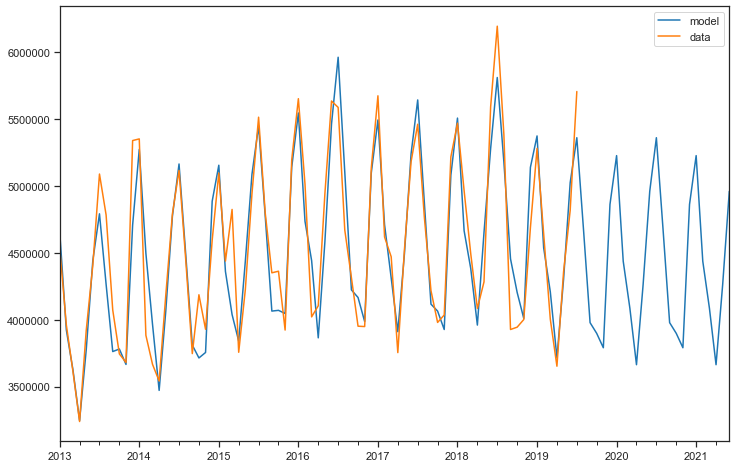

In [30]:
h=24

model = model_c
forecast = model.forecast(h)
plot = pd.DataFrame()
plot['model'] = pd.concat([model.fittedvalues, forecast])
plot['data'] = y1
#pd.Series(model.fittedvalues + model.fcastvalues), 
#                         index=pd.period_range(y.index[0],y.index[-1]+h,freq=y.index.freq))

plot['2010':].plot();#figsize=(9,6))